In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Utilities

In [2]:
# Default random forest model scored 0.93600 on Kaggle
def build_model(train_X, train_y):
    model = RandomForestClassifier(random_state=0)
    model.fit(train_X, train_y)

    return model


def load_data(filename='train.csv'):
    train_data = pd.read_csv(filename)

    y = train_data['label']
    X = train_data.iloc[:, 1:]

    return X, y


def write_output(predictions, filename='output.csv'):
    with open(filename, 'w') as fout:
        writer = csv.writer(fout)
        writer.writerow(['ImageId', 'Label'])
        for i, p in enumerate(predictions, 1):
            writer.writerow([i, p])

## Load Data

In [3]:
X, y = load_data()

## Random Forest AS-IS

In [4]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)
model = build_model(train_X, train_y)
predictions = model.predict(val_X)
mean_absolute_error(predictions, val_y)

0.2341904761904762

## Add horizontal, vertical lines as features

In [5]:
vertical_lines = [X.iloc[:, i::28].mean(axis=1) for i in range(28)]
horizontal_lines = \
    [X.iloc[:, i * 28:(i + 1) * 28].mean(axis=1) for i in range(28)]

X = pd.concat([X] + vertical_lines + horizontal_lines, axis=1)

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)
model = build_model(train_X, train_y)
predictions = model.predict(val_X)
mean_absolute_error(predictions, val_y)

0.23200000000000001

## Feature Importances

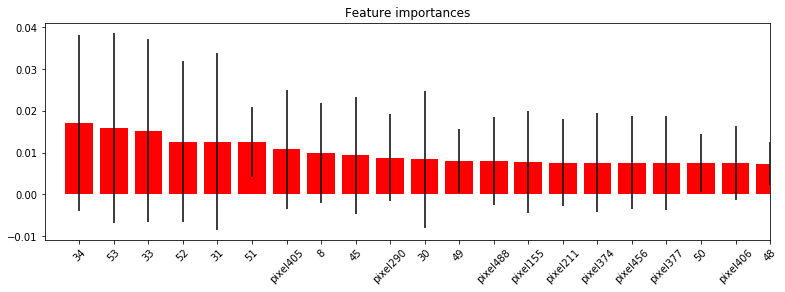

In [6]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(13, 4))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45)
plt.xlim([-1, 20])
plt.show()